# Lemurs Dataset
The [Duke Lemur Center](https://lemur.duke.edu/) (DLC)
is an 85 acre research facility in Durham, North Carolina
that currently houses over 200 lemurs from many different
species of lemurs. Researchers at the DLC care for
lemurs and record data on their growth, diet, and
social interactions, to learn more about these amazing
animals on the edge of extinction in their native Madagascar.

<img src="../images/leaping.jpg" alt="" width="600"/>

In [1]:
# Import numpy
import numpy as np

# Import pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Apply the default theme
sns.set_theme()

# import sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load Weight Data
The lemurs are regularly weighed as part of their medical
checkups throughout the year. The **Weight_File** table
holds the information recorded during
each lemur's weighing. Each row is a different
weighing instance. The columns are described in the
**Descriptions and Usage Notes** file.

In [2]:
wdf = pd.read_csv('../data/lemur_weight.csv')

In [3]:
wdf.shape

(82609, 33)

In [4]:
wdf.head(5)

,Taxon,Hybrid,DLC_ID,Sex,Name,DOB,DOB_Estimated,Weight_g,Weight_Date,MonthOfWeight,AgeAtWt_d,AgeAtWt_wk,AgeAtWt_mo,AgeAtWt_mo_NoDec,AgeAtWt_y,Change_Since_PrevWt_g,Days_Since_PrevWt,Avg_Daily_WtChange_g,DOD,DaysBeforeDeath,Birth_Type,Birth_Institution,Litter_Size,R_Min_Dam_AgeAtConcep_y,Age_Category,Current_Resident,Preg_Status,Expected_Gestation_d,ConcepDate_IfPreg,InfantDOB_IfPreg,DaysBeforeInfBirth_IfPreg,Pct_PregRemain_IfPreg,InfantLitSz_IfPreg
0,OGG,N,5,M,KANGA,25Aug1961,NaN,1086.0,16Feb1972,2,3827.0,546.71,125.82,125.0,10.48,NaN,NaN,NaN,07Feb1977,1818.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN
1,OGG,N,5,M,KANGA,25Aug1961,NaN,1190.0,20Jun1972,6,3952.0,564.57,129.93,129.0,10.83,104.0,125.0,0.83,07Feb1977,1693.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN
2,OGG,N,6,F,ROO,17Mar1961,NaN,947.0,16Feb1972,2,3988.0,569.71,131.11,131.0,10.93,NaN,NaN,NaN,15Oct1974,972.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN
3,OGG,N,6,F,ROO,17Mar1961,NaN,1174.0,26Jun1972,6,4119.0,588.43,135.42,135.0,11.28,227.0,131.0,1.73,15Oct1974,841.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN
4,OGG,N,9,M,POOH BEAR,30Sep1963,NaN,899.0,16Feb1972,2,3061.0,437.29,100.64,100.0,8.39,NaN,NaN,NaN,13Feb1974,728.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN


### Examining the data

In [5]:
wdf['Taxon'].nunique()

27

In [6]:
wdf['Sex'].value_counts()

M     42037
F     40557
ND       15
Name: Sex, dtype: int64

In [7]:
wdf['Age_Category'].value_counts()

adult          58295
IJ             17030
young_adult     7284
Name: Age_Category, dtype: int64

In [8]:
wdf['DLC_ID'].nunique()

2270

In [9]:
wdf['Name'].unique()

array(['KANGA', 'ROO', 'POOH BEAR', ..., 'SITA', 'DANU-A', 'KANTIL'],
      dtype=object)

### Who was the first lemur to be pregnant at the DLC? 

In [10]:
# transform string column to datetime
wdf['conception_date'] = pd.to_datetime(wdf['ConcepDate_IfPreg'])
wdf['infant_dob'] = pd.to_datetime(wdf['InfantDOB_IfPreg'])

In [11]:
g = wdf[ (wdf['Preg_Status'] == 'P') & (wdf['conception_date'] == wdf['conception_date'].min()) ]
g[['Taxon', 'Name' , 'InfantLitSz_IfPreg', 'infant_dob']]

,Taxon,Name,InfantLitSz_IfPreg,infant_dob
20485,ERUF,CALO,1.0,1972-03-08


### Birth Type, Species

In [12]:
g = wdf[['DLC_ID', 'Taxon', 'Birth_Type']].drop_duplicates()
g = g.groupby(['Taxon', 'Birth_Type']).size().reset_index()
g.columns = ['Taxon', 'Birth_Type', 'count']

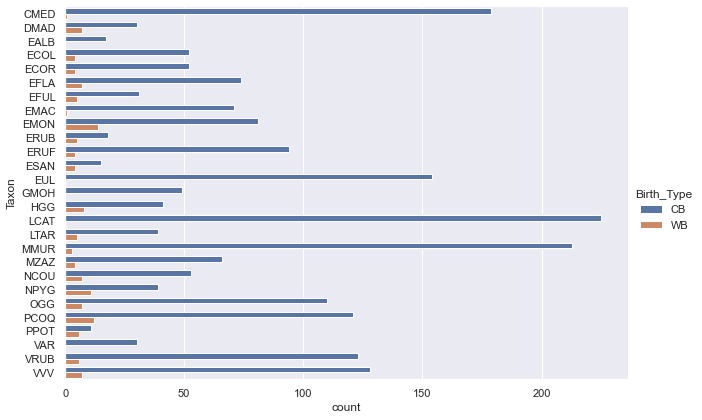

In [13]:
g = g[ g['Birth_Type'] != 'Unk' ]

bar = sns.catplot(
    data=g,
    kind='bar',
    x='count',
    y='Taxon',
    hue='Birth_Type',
    height=6,
    aspect=1.5
)

### Merging with common name fact table

In [14]:
common_name = {
    'CMED': ['Fat-tailed dwarf lemur'],
    'DMAD' : ['Aye-aye'],
    'EALB' : ['White-fronted brown lemur'],
    'ECOL' : ['Collared brown lemur'],
    'ECOR' : ['Crowned lemur'],
    'EFLA' : ['Blue-eyed black lemur'],
    'EFUL' : ['Common brown lemur'],
    'EMAC' : ['Black lemur'],
    'EMON' : ['Mongoose lemur'],
    'ERUB' : ['Red-bellied lemur'],
    'ERUF' : ['Red-fronted brown lemur'],
    'ESAN' : ['Sanfords brown lemur'],
    'EUL' : ['Eulemur hybrid'],
    'GMOH' : ['Mohol bushbaby'],
    'HGG' : ['Eastern lesser bamboo lemur'],
    'LCAT' : ['Ring-tailed lemur'],
    'LTAR' : ['Slender loris'],
    'MMUR' : ['Gray mouse lemur'],
    'MZAZ' : ['Northern giant mouse lemur'],
    'NCOU' : ['Slow loris'],
    'NPYG' : ['Pygmy slow loris'],
    'OGG' : ['Northern greater galago'],
    'PCOQ' : ['Coquerels sifaka'],
    'PPOT' : ['Potto'],
    'VAR' : ['Varecia hybrid'],
    'VRUB' : ['Red ruffed lemur'],
    'VVV' : ['Black-and-white ruffed lemur']
}

names = pd.DataFrame(common_name)
names = names.T
names.columns = ['common']
names

,common
CMED,Fat-tailed dwarf lemur
DMAD,Aye-aye
EALB,White-fronted brown lemur
ECOL,Collared brown lemur
ECOR,Crowned lemur
EFLA,Blue-eyed black lemur
EFUL,Common brown lemur
EMAC,Black lemur
EMON,Mongoose lemur
ERUB,Red-bellied lemur


In [15]:
wdf = wdf.merge(names, how='inner', left_on='Taxon', right_index=True)

In [16]:
wdf.head(2)

,Taxon,Hybrid,DLC_ID,Sex,Name,DOB,DOB_Estimated,Weight_g,Weight_Date,MonthOfWeight,AgeAtWt_d,AgeAtWt_wk,AgeAtWt_mo,AgeAtWt_mo_NoDec,AgeAtWt_y,Change_Since_PrevWt_g,Days_Since_PrevWt,Avg_Daily_WtChange_g,DOD,DaysBeforeDeath,Birth_Type,Birth_Institution,Litter_Size,R_Min_Dam_AgeAtConcep_y,Age_Category,Current_Resident,Preg_Status,Expected_Gestation_d,ConcepDate_IfPreg,InfantDOB_IfPreg,DaysBeforeInfBirth_IfPreg,Pct_PregRemain_IfPreg,InfantLitSz_IfPreg,conception_date,infant_dob,common
0,OGG,N,5,M,KANGA,25Aug1961,NaN,1086.0,16Feb1972,2,3827.0,546.71,125.82,125.0,10.48,NaN,NaN,NaN,07Feb1977,1818.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Northern greater galago
1,OGG,N,5,M,KANGA,25Aug1961,NaN,1190.0,20Jun1972,6,3952.0,564.57,129.93,129.0,10.83,104.0,125.0,0.83,07Feb1977,1693.0,CB,Duke Lemur Center,1.0,0.59,adult,N,NP,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,Northern greater galago


### Weight, Species, Sex

In [17]:
g = wdf[['DLC_ID', 'common', 'Sex', 'Weight_g']].drop_duplicates()
g = g.groupby(['common', 'Sex']).mean().reset_index()
g = g[['common', 'Sex', 'Weight_g']]

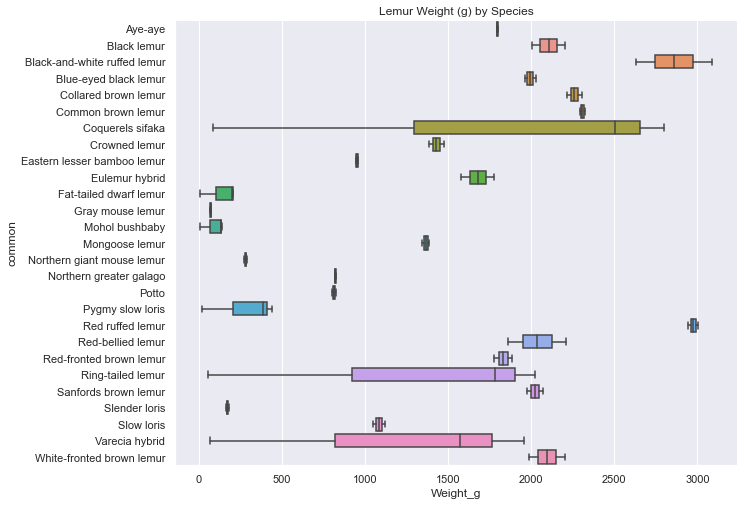

In [18]:
box = sns.catplot(
    data=g,
    x="Weight_g",
    y='common',
    kind='box',
    height=7,
    aspect=1.5
).set(
    title="Lemur Weight (g) by Species"
)

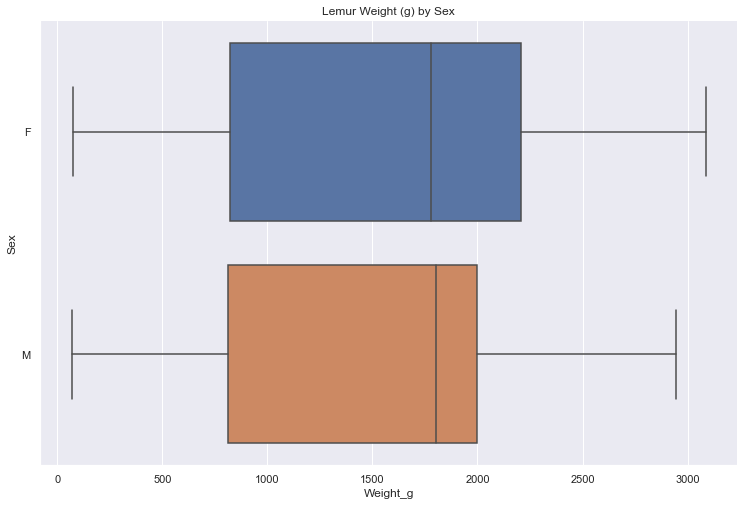

In [19]:
g = g[g['Sex']!='ND']

box = sns.catplot(
    data=g,
    x="Weight_g",
    y='Sex',
    kind='box',
    height=7,
    aspect=1.5
).set(
    title="Lemur Weight (g) by Sex"
)

# Load Life History Data
The **Life History** table holds aggregate information about the
species of lemurs in residence at the DLC. Each row is a different
species. The columns are described in the
**Descriptions and Usage Notes** file.

In [20]:
hdf = pd.read_csv('../data/lemur_history.csv', index_col='Variable')

In [21]:
hdf = hdf.T

In [22]:
columns = [
    'R_Ratio_MtoF_DLCBirths',
    'R_Mean_LitterSize',
    'R_Expected_Gestation_d',
    'R_Peak_Birth_Month',
    'M_Mean_All_AdultWeight_g',
    'M_Mean_All_NeonateWeight_g',
    'M_Mean_All_YngAdultWeight_g',
    'L_Median_All_Longevity_gt30d_y',
    'L_Pct_All_InfMort_lt30d'
]

hdf = hdf[columns]

In [23]:
hdf.shape

(27, 9)

In [24]:
# coercing errors will convert anything unparsable to NaN. We can then exclude these values later. 
for col in columns:
    hdf[col] = pd.to_numeric(hdf[col], errors='coerce')

In [25]:
hdf.dropna(inplace=True)

In [26]:
hdf.shape

(26, 9)

In [27]:
hdf.head()

Variable,R_Ratio_MtoF_DLCBirths,R_Mean_LitterSize,R_Expected_Gestation_d,R_Peak_Birth_Month,M_Mean_All_AdultWeight_g,M_Mean_All_NeonateWeight_g,M_Mean_All_YngAdultWeight_g,L_Median_All_Longevity_gt30d_y,L_Pct_All_InfMort_lt30d
CMED,1.267,2.18,62,7,237.60,13.21,237.21,15.07,0.29
DMAD,0.706,1.00,165,0,2690.07,106.55,2588.45,25.10,0.10
ECOL,1.269,1.22,123,4,2333.61,62.49,2245.34,21.12,0.25
ECOR,1.667,1.22,124,5,1644.84,55.81,1550.73,18.71,0.33
EFLA,0.917,1.05,124,3,2433.89,78.51,2227.93,19.57,0.23


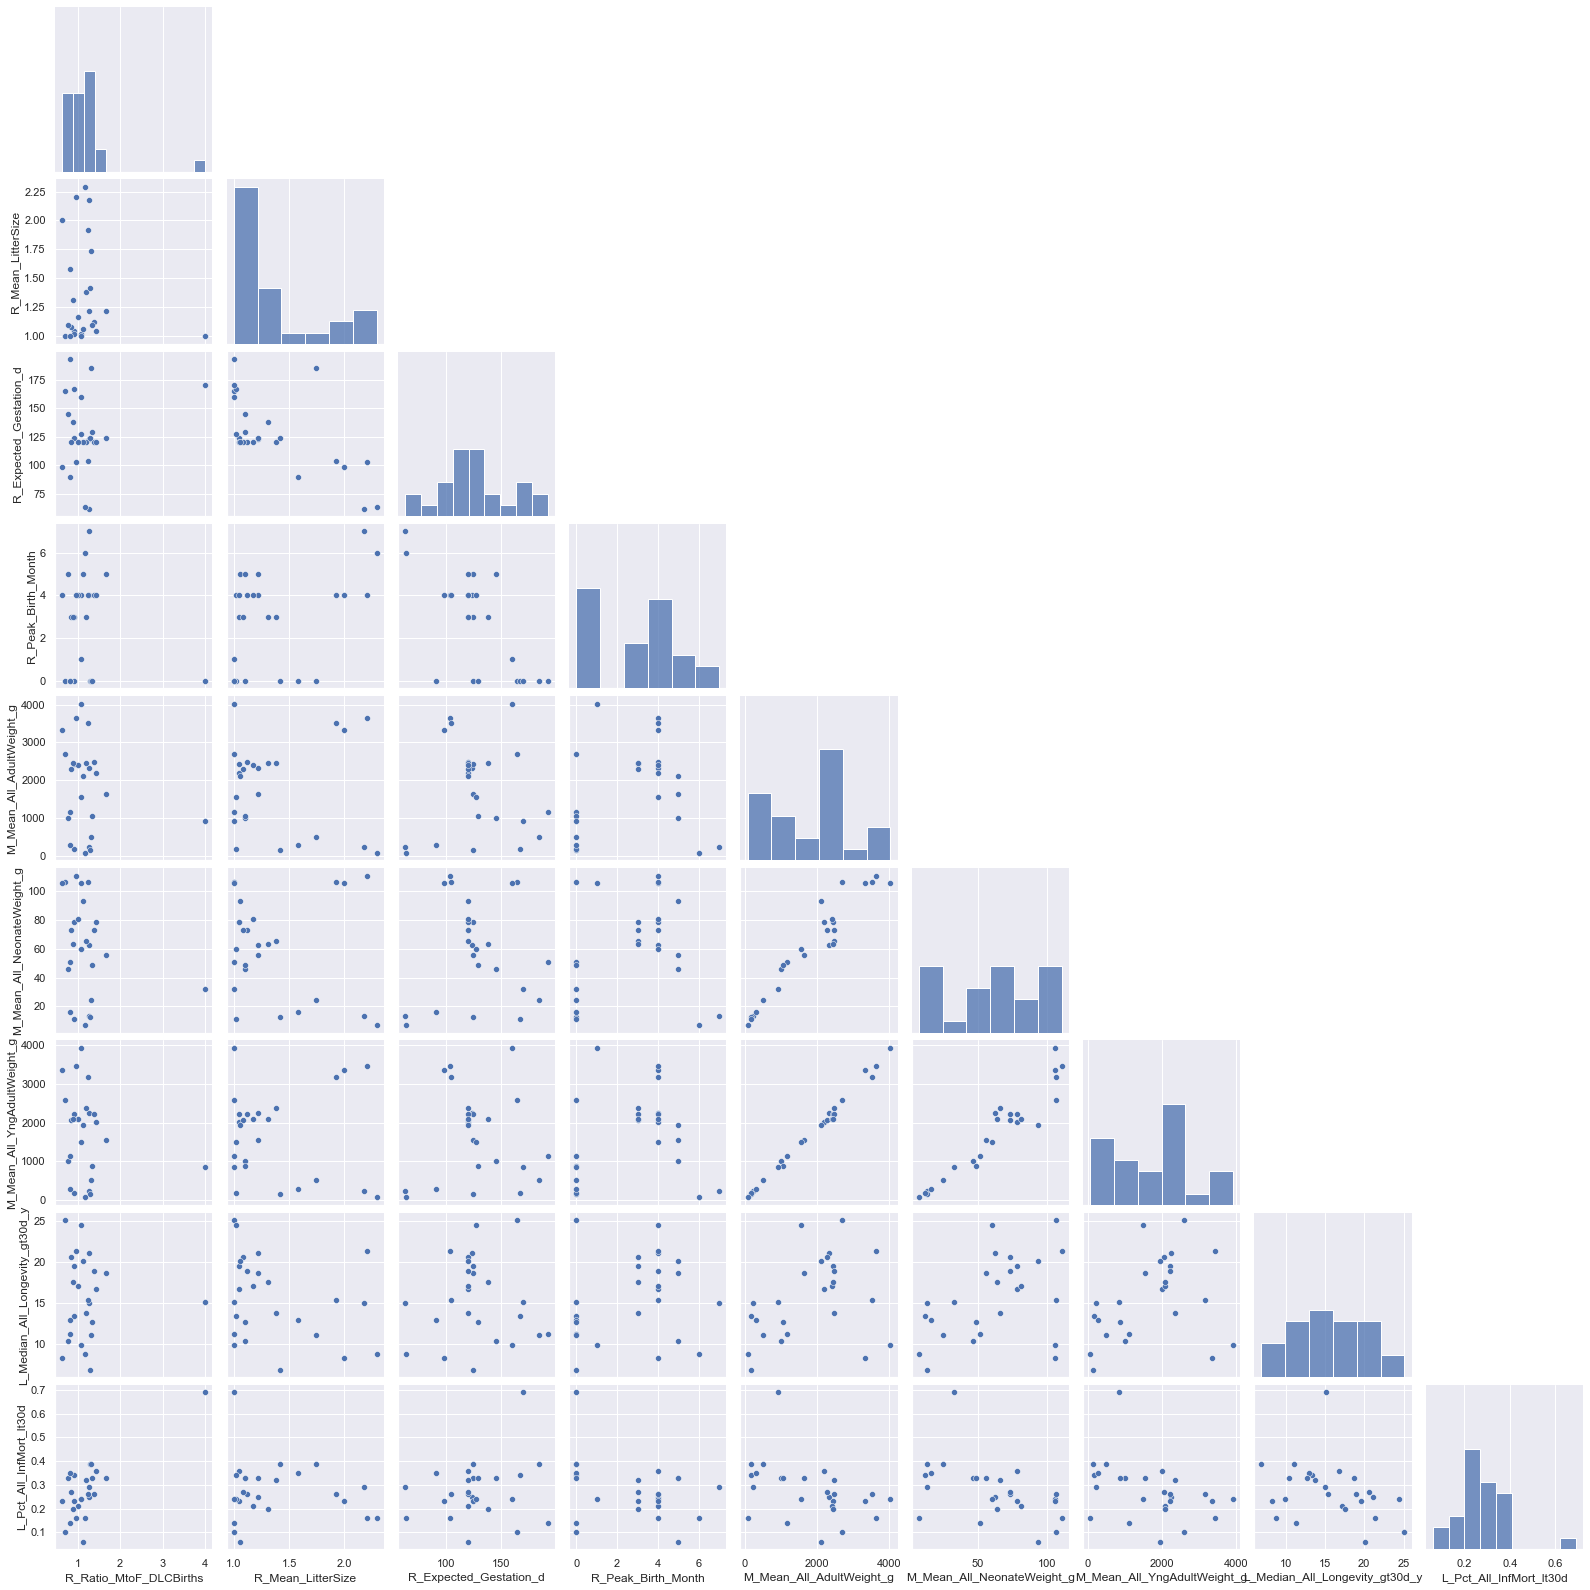

In [28]:
_ = sns.pairplot(
    data=hdf,
    corner=True
)

### Clustering Species - How many clusters?

In [29]:
x = StandardScaler().fit_transform(hdf.values)

In [30]:
inertia = []
for k in range(1, 20):
    result = KMeans(k).fit(x)
    inertia.append([k, result.inertia_])

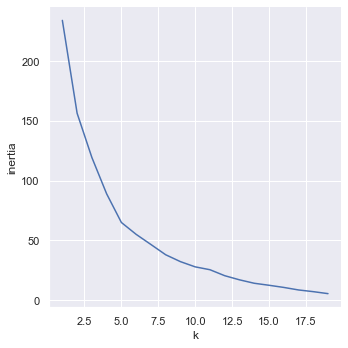

In [31]:
line = sns.relplot(
    data=pd.DataFrame(inertia, columns=['k', 'inertia']),
    x='k',
    y='inertia',
    kind='line'
)

### Clustering Species - What if we performed PCA first?

In [32]:
pca = PCA(n_components=6).fit(x)

In [33]:
pcadf = pd.DataFrame({
    'component': ['PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5', 'PCA-6'],
    'variance': pca.explained_variance_
})

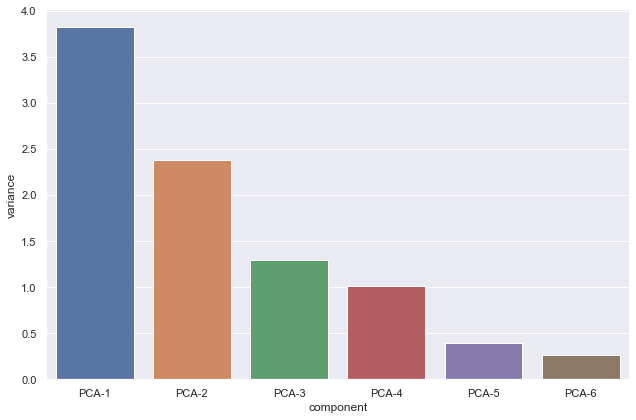

In [34]:
bar = sns.catplot(
    data=pcadf,
    kind='bar',
    x='component',
    y='variance',
    height=6,
    aspect=1.5
)

### Clustering Species (n_components=2)

In [35]:
x = PCA(n_components=2).fit_transform(x)

In [36]:
inertia = []
for k in range(1, 20):
    result = KMeans(k).fit(x)
    inertia.append([k, result.inertia_])

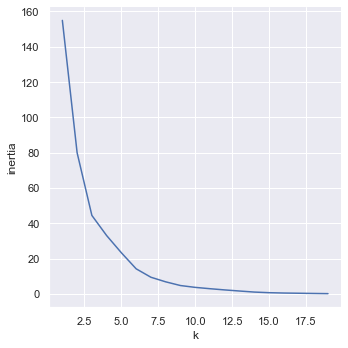

In [37]:
line = sns.relplot(
    data=pd.DataFrame(inertia, columns=['k', 'inertia']),
    x='k',
    y='inertia',
    kind='line'
)

### Clustering Species (k=6)

In [38]:
result = KMeans(6).fit(x)

In [39]:
result.cluster_centers_

array([[ 2.22885336, -0.11183808],
       [-0.6063008 , -0.32963998],
       [ 1.61695795,  3.97138819],
       [ 3.96033596, -3.03815975],
       [-2.20427705, -2.03067556],
       [-2.37237729,  0.86345069]])

In [40]:
hdf['cluster'] = result.labels_

In [41]:
pcadf = pd.DataFrame(x, columns=['PCA-1', 'PCA-2'])
pcadf['cluster'] = result.labels_

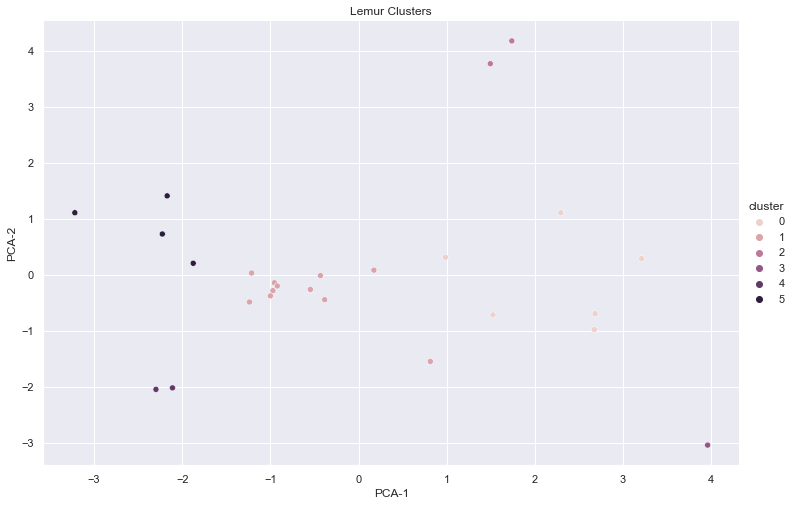

In [42]:
scatter = sns.relplot(
    data=pcadf,
    x='PCA-1',
    y='PCA-2',
    hue='cluster',
    height=7,
    aspect=1.5
).set(
    title="Lemur Clusters"
)